In [9]:
#ico class
import os
import numpy as np
import nibabel as nb
import copy
from scipy import sparse 
import meld_classifier.mesh_tools as mt
import torch
from math import pi 
import logging
from meld_graph.icospheres import IcoSpheres
import matplotlib_surface_plotting as msp
from scipy.stats import special_ortho_group
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
# import logging
logging.basicConfig(level=logging.DEBUG)
from meld_graph.data_preprocessing import Preprocess

In [14]:

def load_config(config_file):
    """load config.py file and return config object"""
    import importlib.machinery, importlib.util
    loader = importlib.machinery.SourceFileLoader("config", config_file)
    spec = importlib.util.spec_from_loader(loader.name, loader)
    config = importlib.util.module_from_spec(spec)
    loader.exec_module(config)
    return config



In [16]:
config = load_config('../scripts/config_files/testing_distances.py')

cur_data_parameters = config.data_parameters
cur_network_parameters = config.network_parameters


In [18]:
from meld_classifier.meld_cohort import MeldCohort
cohort = MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5',
               dataset='MELD_dataset_V6.csv')


In [ ]:
prep = Preprocess(
            cohort=cohort, params=self.params["preprocessing_parameters"],
            icospheres = icos
        )

In [2]:
# create 

icos=IcoSpheres(conv_type='SpiralConv')
ico_index=7
ico_ini = icos.icospheres[ico_index]

DEBUG:meld_graph.icospheres:Using coord type pseudo


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/kw350/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/kw350/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/kw350/.cond

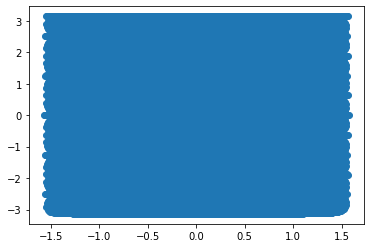

In [3]:
plt.scatter(ico_ini['spherical_coords'][:,0],ico_ini['spherical_coords'][:,1]);

In [9]:
#define center point
#define number of points
#define radius
#randomly separate along the circle
import matplotlib.path as mpltPath


In [10]:
#com
def get_angles(vectors):
    v2 = np.vstack([np.ones(len(vectors)),np.zeros(len(vectors))])
    unit_vectors = vectors.T / np.linalg.norm(vectors,axis=1)
    dot_product = np.einsum('ij,ij->i',  unit_vectors.T,v2.T)

    angles = np.arccos(dot_product)
    return np.rad2deg(angles)


def clockwiseangle_and_distance(point,origin=None):
    import math

    refvec = [0, 1]
    # Vector between point and the origin: v = p - o
    vector = [point[0]-origin[0], point[1]-origin[1]]
    # Length of vector: ||v||
    lenvector = math.hypot(vector[0], vector[1])
    # If length is zero there is no angle
    if lenvector == 0:
        return -math.pi, 0
    # Normalize vector: v/||v||
    normalized = [vector[0]/lenvector, vector[1]/lenvector]
    dotprod  = normalized[0]*refvec[0] + normalized[1]*refvec[1]     # x1*x2 + y1*y2
    diffprod = refvec[1]*normalized[0] - refvec[0]*normalized[1]     # x1*y2 - y1*x2
    angle = math.atan2(diffprod, dotprod)
    # Negative angles represent counter-clockwise angles so we need to subtract them 
    # from 2*pi (360 degrees)
    if angle < 0:
        return 2*math.pi+angle, lenvector
    # I return first the angle because that's the primary sorting criterium
    # but if two vectors have the same angle then the shorter distance should come first.
    return angle, lenvector

#s=np.array(sorted(pts, key=clockwiseangle_and_distance))


In [30]:
def generate_synthetic_subject(n_features,icos,bias,radius=1):
    from sklearn.metrics import pairwise_distances
    f_radius = np.clip(np.random.normal(radius,radius/2),0.05,2)
    f_bias = np.clip(np.random.normal(bias,bias/2),0,100)
    coords  = icos
    com_i = np.random.choice(len(coords))
    origin=coords[com_i]
    distances=pairwise_distances(origin.reshape(-1,1).T,coords, metric='haversine')[0]
    n_points = np.random.choice(6)+4
    print(f_bias)
    subset = coords[distances<f_radius]
    poly_i=np.random.choice(len(subset),n_points)
    polygon=subset[poly_i]
    polygon=np.array(sorted(polygon, key=lambda point: clockwiseangle_and_distance(point,origin)))
    path = mpltPath.Path(polygon)
    lesion = path.contains_points(coords)
    n_verts=len(coords)
 
    features = np.random.normal(0,1,(n_verts,n_features))+lesion.astype(int).reshape(-1,1)*f_bias
    return features, lesion


In [31]:

features,lesion=generate_synthetic_subject(5,ico_ini['spherical_coords'],bias=0.5,radius=1.)

0.13655212273347872


In [32]:
#plt.scatter(ico_ini['spherical_coords'][:,0],ico_ini['spherical_coords'][:,1],c=inside2);

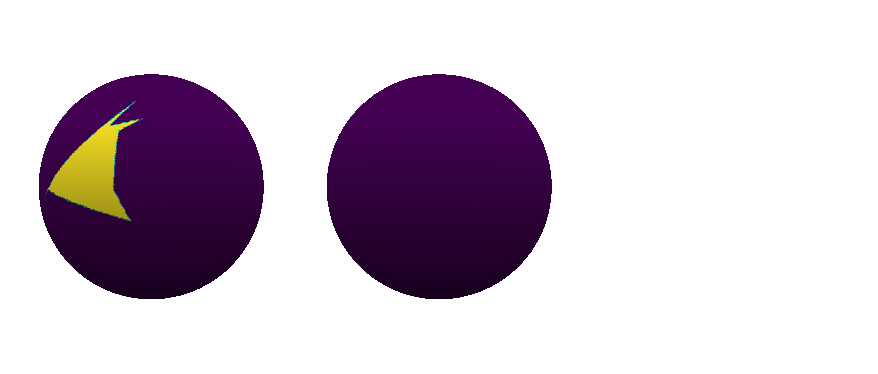

In [33]:
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              lesion, 
              colorbar=False, rotate=[90,270], 
                 )



In [40]:
import meld_classifier.su

1055

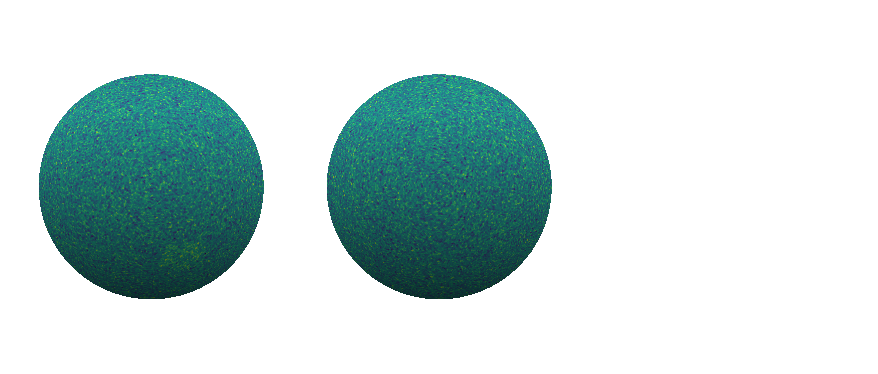

In [41]:
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              features[:,0], 
              colorbar=False, rotate=[90,270], 
                 )



In [312]:
np.ran

array([[1.63842432e+05, 2.58944037e+00],
       [1.63842432e+05, 2.58944037e+00],
       [1.63842432e+05, 2.58944037e+00],
       ...,
       [1.63842432e+05, 2.58944037e+00],
       [1.63842432e+05, 2.58944037e+00],
       [1.63842432e+05, 2.58944037e+00]])